# Example: Linear Fit

This notebook demonstrates fitting a simple linear model $y(x) = a \cdot x + b$ using fitle.

In [38]:
import fitle as fl
import numpy as np
import matplotlib.pyplot as plt
import mplhep
mplhep.style.use(mplhep.style.LHCb2)

## Defining Parameters

First, we define parameters using `Param`. Calling a `Param` with:
- Two scalars sets its bounds
- One scalar sets its starting value  
- A string sets its name

This can be done in any order and is chainable.

We define a Model that represents the linear equation $y(x) = a \cdot x + b$, where:
- $a > 0$ (positive constraint)
- $b$ is between -5 and 5

In [39]:
a = fl.Param.positive('a')
b = fl.Param(-5, 5)('b')

linear_model = a * fl.INPUT + b
linear_model

a=1 * INPUT + b=0

Here, `linear_model` represents $y(x) = a \cdot x + b$, and `linear_model(x)` returns the output with the starting values of the parameters.

## Defining the Cost Function

To fit this equation to data, we define a `Cost` instance with the data and the method (Mean Squared Error).

In [41]:
data_x = np.array([-2, -1, 0, 1, 2])
data_y = np.array([0, 0, 1, 1, 2])

cost = fl.Cost.MSE(data_x, data_y)

## Piping the Model to the Cost

With the pipe operator `|`, we create a `Model` that represents the cost of `linear_model` with respect to the data and method.

In [42]:
model_cost = linear_model | cost
model_cost

sum(([0 0 1 1 2] - (a=1 * [-2 -1  0  1  2] + b=0)) ** 2)

As seen above, `model_cost` is a `Model` that represents the MSE of `linear_model` on the data. Calling `model_cost()` returns the cost metric with the starting values of `a` and `b`:

In [43]:
model_cost()

6.0

## Fitting the Model

To fit, we use the `fit()` function. By default, this calculates the gradient of the cost with respect to `a` and `b`, and compiles both the cost function and its gradient using Numba.

In [44]:
fit_result = fl.fit(model_cost)
fit_result

<FitResult fval=0.300, success=True>
a: 0.5015 ± 0.31
b: 0.8039 ± 0.45

## Plotting the Results

After fitting, the values of `a` and `b` are updated to those that minimize the cost function.

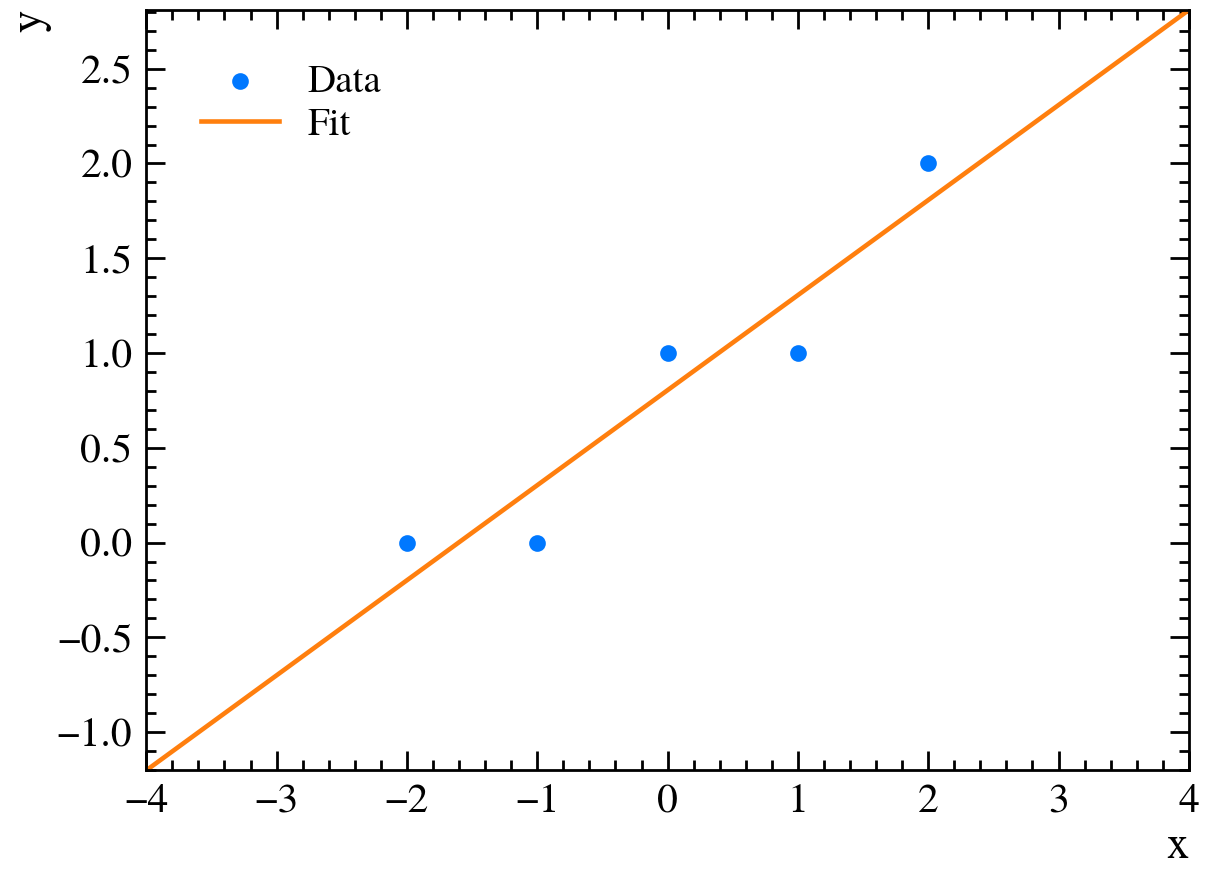

In [51]:
plt.scatter(data_x, data_y, label='Data', s=100, zorder=5)

# Extend fit line beyond data boundaries
x_plot = np.linspace(-4, 4, 100)
plt.plot(x_plot, linear_model(x_plot), label='Fit', color='tab:orange')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Accessing Fit Results

The fitted values and errors are accessible from both the parameters and the fit result:

In [57]:
print(f"a = {a.value:.4f} +/- {a.error:.4f}")
print(f"b = {b.value:.4f} +/- {b.error:.4f}")

print(f"\nFit result values: {fit_result.values}")
print(f"Fit result errors: {fit_result.errors}")

a = 0.5015 +/- 0.3104
b = 0.8039 +/- 0.4466

Fit result values: {'a': 0.501474455674885, 'b': 0.8039469862366033}
Fit result errors: {'a': 0.3104269246452036, 'b': 0.44663075536333474}


## Concise Version

The same fitting code can be written more concisely in a single line:

In [53]:
fit_result = fl.fit(
    fl.Param.positive('a') * fl.INPUT + fl.Param(-5, 5)('b')
    | fl.Cost.MSE(data_x, data_y)
)
fit_result

<FitResult fval=0.300, success=True>
a: 0.5015 ± 0.31
b: 0.8039 ± 0.45